In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
cd ~/bmi_dynamics_code/

/Users/preeyakhanna/bmi_dynamics_code


In [16]:
from online_analysis import plot_fr_diffs, plot_pred_fr_diffs, pred_fwd, util_fcns

In [74]:
import analysis_config

In [28]:
import seaborn

In [89]:
#seaborn.set(font='Arial',context='talk',font_scale=.6, style='white')
seaborn.set(font='Arial',context='talk',font_scale=.8, style='white')

In [4]:
%matplotlib notebook

online_analysis/plot_fr_diffs.py:1468: RuntimeWarning: invalid value encountered in double_scalars
  perc_sig[animal, day_ix][mag, ang, mov].append(np.array((pv, dFR, dFR/global_mean_FR[i_neur], global_mean_FR[i_neur]), dtype=dtype_su))
online_analysis/plot_fr_diffs.py:1468: RuntimeWarning: divide by zero encountered in double_scalars
  perc_sig[animal, day_ix][mag, ang, mov].append(np.array((pv, dFR, dFR/global_mean_FR[i_neur], global_mean_FR[i_neur]), dtype=dtype_su))


<IPython.core.display.Javascript object>


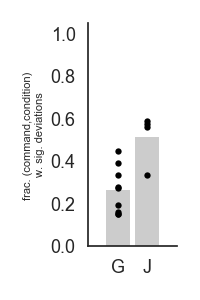

<IPython.core.display.Javascript object>


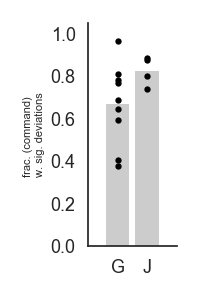

<IPython.core.display.Javascript object>


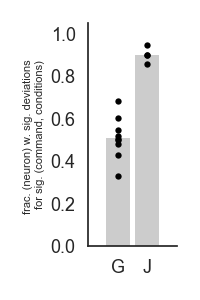

<IPython.core.display.Javascript object>


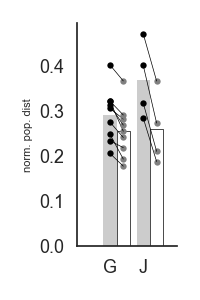

<IPython.core.display.Javascript object>


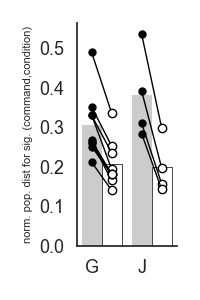

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


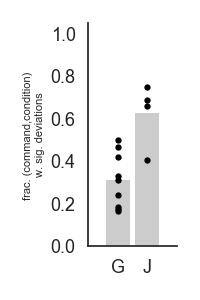

<IPython.core.display.Javascript object>


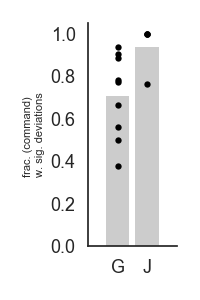

<IPython.core.display.Javascript object>


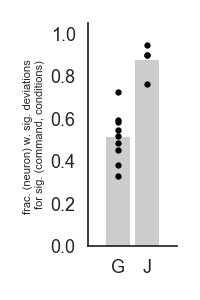

<IPython.core.display.Javascript object>


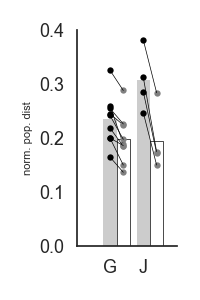

<IPython.core.display.Javascript object>


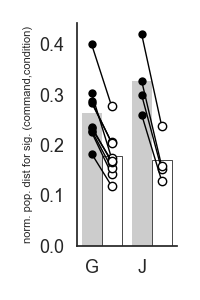

<IPython.core.display.Javascript object>


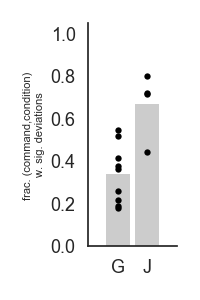

<IPython.core.display.Javascript object>


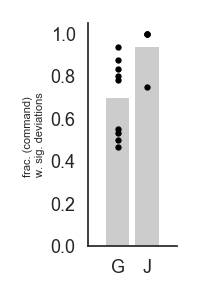

<IPython.core.display.Javascript object>


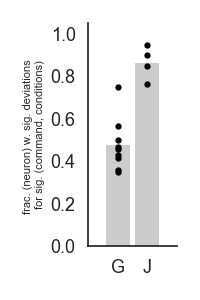

<IPython.core.display.Javascript object>


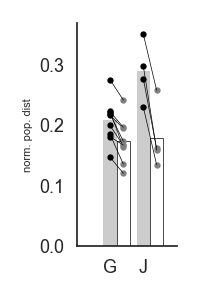

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


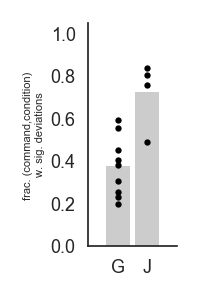

<IPython.core.display.Javascript object>


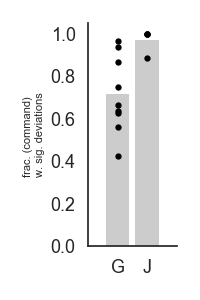

<IPython.core.display.Javascript object>


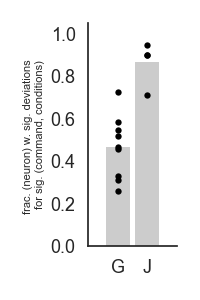

<IPython.core.display.Javascript object>


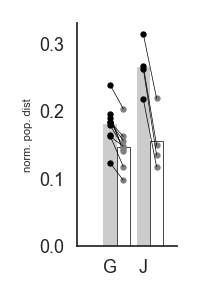

<IPython.core.display.Javascript object>


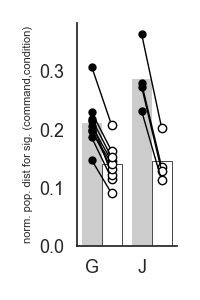

<IPython.core.display.Javascript object>


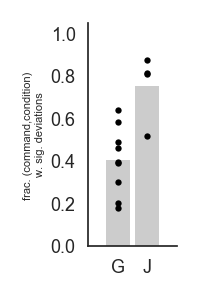

<IPython.core.display.Javascript object>


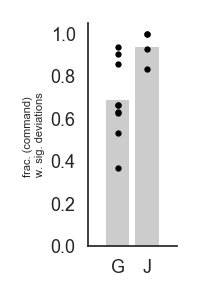

<IPython.core.display.Javascript object>


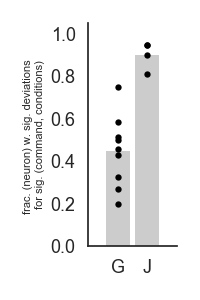

<IPython.core.display.Javascript object>


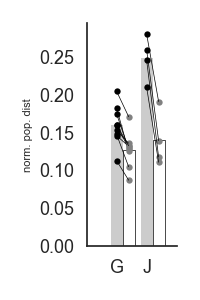

<IPython.core.display.Javascript object>


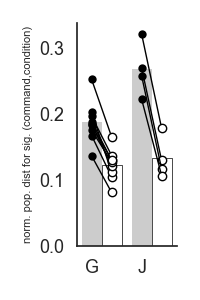

<IPython.core.display.Javascript object>


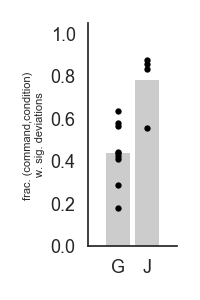

<IPython.core.display.Javascript object>


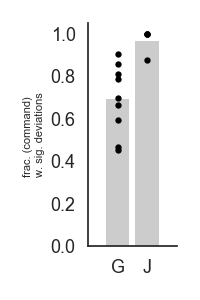

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
##################################################
########## Mean difference #######################
##################################################
COUNT = {}
for mcc in [3, 5, 7, 10, 15, 20, 25]: 

    #### results if NO position matching + making sure Nglobal >>  2*NCommand
    ps, psv, nit, pooled_stats = plot_fr_diffs.perc_neuron_command_move_sig(nshuffs=100, 
                                                                            min_com_cond = mcc)
    count = plot_fr_diffs.plot_pooled_stats_fig3_science_compression(pooled_stats, save=False)
    COUNT[mcc]=count
pickle.dump(COUNT, open('mean_diff_sweep_minCC.pkl', 'wb'))

<IPython.core.display.Javascript object>


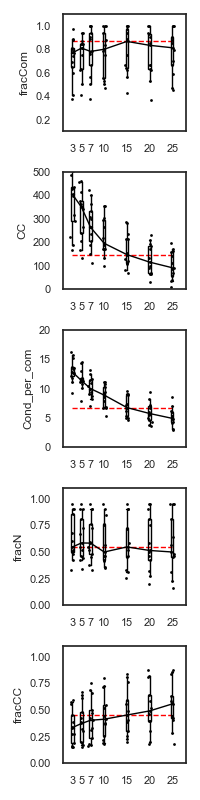

In [70]:
COUNT = pickle.load(open('mean_diff_sweep_minCC.pkl', 'rb'))

f, ax = plt.subplots(nrows = 5, figsize = (2, 8))
day_ix = np.arange(13)
ylims = {}
ylims['fracCom'] = [0.1, 1.1]
ylims['CC'] = [0, 500]
ylims['fracN'] = [0, 1.1]
ylims['fracCC'] = [0, 1.1]
ylims['Cond_per_com'] = [0., 20.]


for i, (axi, key) in enumerate(zip(ax, COUNT[3].keys())):
    mn = []; 
    for mcc in [3, 5, 7, 10, 15, 20, 25]: 
        axi.plot(np.random.randn(len(day_ix), )*.2 + mcc, np.array(COUNT[mcc][key]), 'k.', 
                markersize=4)
        mn.append(np.median(np.array(COUNT[mcc][key])))
        util_fcns.draw_plot(mcc, np.array(COUNT[mcc][key]), 'k', np.array([0., 0., 0., 0.]), axi)

        if mcc == 15: 
            axi.hlines(np.median(np.array(COUNT[mcc][key])), 3, 25, 'r', linestyle='dashed', linewidth=1.)
    axi.plot(np.array([3, 5, 7, 10, 15, 20, 25]), mn, 'k-', linewidth=1)
    axi.set_ylabel(key)
    axi.set_xlim([1, 28])
    axi.set_ylim(ylims[key])
    axi.set_xticks([3, 5, 7, 10, 15, 20, 25])
    axi.set_xticklabels([3, 5, 7, 10, 15, 20, 25])
        
        
        
f.tight_layout()
util_fcns.savefig(f, 'mean_diff_sweep_minCC')

In [21]:
##################################################
########## Pred mean difference ##################
##################################################
COUNT2 = {}
for mcc in [3, 5, 7, 10, 15, 20, 25, 30]: 
    count2 = plot_pred_fr_diffs.frac_sig_science_compressions(nshuffs = 100, min_com_cond = mcc, 
                                                              save = False)
    COUNT2[mcc] = count2;
pickle.dump(COUNT2, open('pred_mean_diff_sweep_minCC.pkl', 'wb'))

<IPython.core.display.Javascript object>


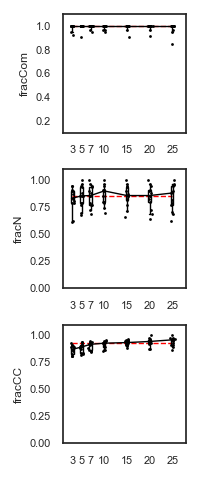

In [71]:
COUNT2 = pickle.load(open('pred_mean_diff_sweep_minCC.pkl', 'rb'))

f, ax = plt.subplots(nrows = 3, figsize = (2, 8/5.*3.))
day_ix = np.arange(13)

ylims['fracCom'] = [0.1, 1.1]
ylims['CC'] = [0, 500]
ylims['fracN'] = [0., 1.1]
ylims['fracCC'] = [0, 1.1]
 
for i, (axi, key) in enumerate(zip(ax, COUNT2[3].keys())):
    mn = []; 
    for mcc in [3, 5, 7, 10, 15, 20, 25]: 
        axi.plot(np.random.randn(len(day_ix), )*.2 + mcc, np.array(COUNT2[mcc][key]), 'k.', markersize=4)
        mn.append(np.median(np.array(COUNT2[mcc][key])))
        util_fcns.draw_plot(mcc, np.array(COUNT2[mcc][key]), 'k', np.array([0., 0., 0., 0.]), axi)
        if mcc == 15: 
            axi.hlines(np.median(np.array(COUNT2[mcc][key])), 3, 25, 'r', linestyle='dashed', linewidth=1)
    axi.plot(np.array([3, 5, 7, 10, 15, 20, 25]), mn, 'k-', linewidth=1)
    if ia == 0: 
        axi.set_ylabel(key)
    axi.set_xlim([1, 28])
    axi.set_ylim(ylims[key])
    axi.set_xticks([3, 5, 7, 10, 15, 20, 25])
    axi.set_xticklabels([3, 5, 7, 10, 15, 20, 25])
        
f.tight_layout()
util_fcns.savefig(f, 'pred_mean_diff_sweep_minCC')

In [22]:
##################################################
########## Pred next command #####################
##################################################
COUNT3 = {}
for mcc in [3, 5, 7, 10, 15, 20, 25]: 
    count3 = pred_fwd.frac_next_com_mov_sig(model_nm = 'hist_1pos_0psh_0spksm_1_spksp_0', model_set_number = 6,
    nshuffs = 100, min_com_cond = mcc, save = False)
    COUNT3[mcc] = count3; 
pickle.dump(COUNT3, open('pred_next_com_sweep_minCC.pkl', 'wb'))

In [58]:
COUNT3[3].keys()

['fracCom', 'nCC', 'fracCC']

<IPython.core.display.Javascript object>


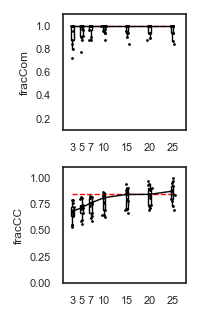

In [72]:
COUNT3 = pickle.load(open('pred_next_com_sweep_minCC.pkl', 'rb'))

f, ax = plt.subplots(nrows = 2, figsize = (2, 8/5.*2))
day_ix = np.arange(13)

ylims['fracCom'] = [0.1, 1.1]
ylims['nCC'] = [0, 500]
ylims['fracCC'] = [0, 1.1]

for i, (axi, key) in enumerate(zip(ax, ['fracCom', 'fracCC'])):
    mn = []; 
    for mcc in [3, 5, 7, 10, 15, 20, 25]: 
        axi.plot(np.random.randn(len(day_ix), )*.2 + mcc, np.array(COUNT3[mcc][key]), 'k.',
                markersize=4)
        mn.append(np.median(np.array(COUNT3[mcc][key])))
        util_fcns.draw_plot(mcc, np.array(COUNT3[mcc][key]), 'k', np.array([0., 0., 0., 0.]), axi)
        if mcc == 15: 
            axi.hlines(np.median(np.array(COUNT3[mcc][key])), 3, 25, 'r', linestyle='dashed', linewidth=1)
    axi.plot(np.array([3, 5, 7, 10, 15, 20, 25]), mn, 'k-', linewidth=1)
    
    axi.set_ylabel(key)
    axi.set_xlim([1, 28])
    axi.set_ylim(ylims[key])
    axi.set_xticks([3, 5, 7, 10, 15, 20, 25])
    axi.set_xticklabels([3, 5, 7, 10, 15, 20, 25])
        
f.tight_layout()
util_fcns.savefig(f, 'pred_next_com_diff_sweep_minCC')

In [4]:
# criteria for analysis 
# 1, 3, 5, 7, 10, 15, 20, 25, 30 
# fraction comm - cond w/ mean diffs sig. 
# fraction comm - cond sig. predicted 
# fraction comm - cond w/ next command sig. pred. 

### If this doesn't matter at all, then choose a low-ish number and sweep number of command bins ### 
# of bins: 
## ang: 4, 8, 12
## mag: 1, 3, 5, 
# comb = 4, 8, 12, 20, 24, 36, 40, 60

# criteria for analysis 

### fraction comm - cond w/ mean diffs as a fcn of # of bins 
### 

In [78]:
ax.set_xlim([-1, 14])
ax.set_xtickl

(-1, 14)

<IPython.core.display.Javascript object>


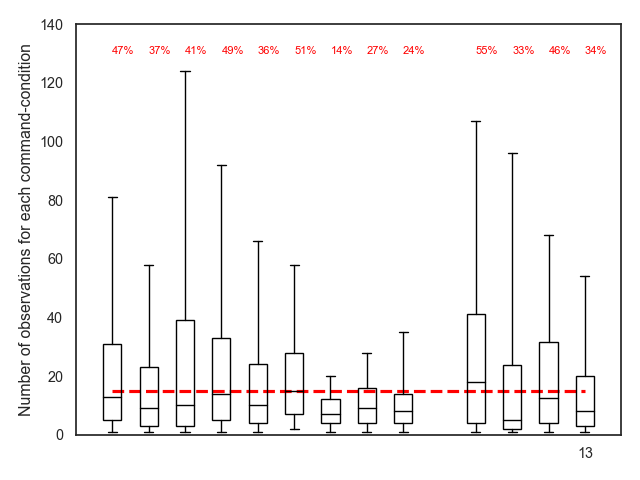

max grom, 0: 81
61.0
39.0
max grom, 1: 58
45.10000000000002
28.0
max grom, 2: 124
83.5
55.0
max grom, 3: 92
72.0
39.0
max grom, 4: 66
51.700000000000045
31.0
max grom, 5: 58
44.0
33.0
max grom, 6: 20
17.0
13.0
max grom, 7: 28
22.0
17.0
max grom, 8: 35
24.0
17.0
max jeev, 0: 107
76.30000000000001
51.0
max jeev, 1: 96
58.900000000000006
33.0
max jeev, 2: 68
57.0
36.0
max jeev, 3: 54
37.0
24.19999999999999


In [100]:
#####################################################################################################
##### distribution of number of observations for each command-condition for each subject / session ##
#####################################################################################################
### Open mag boundaries 
mag_boundaries = pickle.load(open(analysis_config.data_params['mag_bound_file']))

### Plot distribution of command - conditions ### 
f, ax = plt.subplots()

total_com_cond = 0; 
total_com_cond_analyzed = 0; 


for ia, animal in enumerate(['grom', 'jeev']): # add homer later; 
    nsess = analysis_config.data_params['%s_ndays'%animal]

    for day_ix in range(nsess): 

        com_cond_cnt = []
        
        ### Pull data ### 
        spks, push, tsk, trg, bin_num, rev_bin_num, move, dat = util_fcns.get_data_from_shuff(animal, day_ix)
        spks = spks * 10
    
        command_bins = util_fcns.commands2bins([push], mag_boundaries, animal, day_ix, 
                                   vel_ix=[3, 5])[0]

        for mag in range(4):

            for ang in range(8): 

                #### Common indices 
                #### Get the indices for command ####
                ix_com = plot_fr_diffs.return_command_indices(bin_num, rev_bin_num, push, mag_boundaries, 
                                                              mag=mag, ang=ang,
                                       animal=animal, day_ix=day_ix, min_bin_num=0,
                                       min_rev_bin_num=0)
                
                #### Go through the movements ####
                for mov in np.unique(move[ix_com]):

                    ### Movement specific command indices 
                    ix_mc = np.nonzero(move[ix_com] == mov)[0]
                    com_cond_cnt.append(len(ix_mc))
                    
                    total_com_cond += 1; 
                    
                    if len(ix_mc) >= 15: 
                        total_com_cond_analyzed += 1

        
        ### plot 
        util_fcns.draw_plot(day_ix + 10*ia, com_cond_cnt, 'k', np.array([1., 1., 1., 0.]), 
                            ax)
        com_cond_cnt = np.array(com_cond_cnt)
        ix = np.nonzero(com_cond_cnt>=15)[0]
        frac_analyzed = float(len(ix))/float(len(com_cond_cnt))
        
        frac_str = '%d'%(100.*frac_analyzed)
        ax.text(day_ix + 10*ia, 130, frac_str+'%', fontsize=8, color= 'r')
        print('max %s, %d: %d'%(animal, day_ix, np.percentile(com_cond_cnt, 95)))
        print(np.percentile(com_cond_cnt, 90))
        print(np.percentile(com_cond_cnt, 80))
        
        
ax.set_xlim([-1, 14])
ax.set_ylim([0, 140])
ax.hlines(15, 0, 13, 'r', linestyle='dashed')
ax.set_ylabel('Number of observations for each command-condition')
f.tight_layout()






In [101]:
util_fcns.savefig(f, 'num_obs_for_each_CC')

In [87]:
total_com_cond

5761

In [88]:
total_com_cond_analyzed/float(total_com_cond)

0.37962159347335533